<a href="https://colab.research.google.com/github/deepthikanna/The_Sparks_Foundation_Task02/blob/main/Task02_GRIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### NAME   : KRISHNA DEEPTHI K  

GRADUATE ROTATIONAL INTERNSHIP PROGRAM
## **THE SPARKS FOUNDATION**                                                                                                                                                                                                                                                                                
DATA SCIENCE AND BUSINESS ANALYTICS TASKS

TASK 02 : PREDICTION USING UNSUPERVISED ML

    From the iris dataset, predict the optimum number of clusters and represent it visually using PYTHON SCIKIT LEARN.

*IMPORT*


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
data=pd.read_csv("/content/Iris.csv")

In [ ]:
data.head

<bound method NDFrame.head of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

In [ ]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,35,4.9,3.1,1.5,0.1,Iris-setosa
40,41,5.0,3.5,1.3,0.3,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica


In [ ]:
data.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
print ("Dataset Lenght:: ", len(data))
print ("Dataset Shape:: ", data.shape)

Dataset Lenght::  150
Dataset Shape::  (150, 6)


*PREPROCESSING DATA*

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["Species"] = label_encoder.fit_transform(data['Species'])

In [ ]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.model_selection import train_test_split
feature_col_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
predicted_class_name=['Species']
x=data[feature_col_names].values
y=data[predicted_class_name].values
split_test_size=0.30
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=split_test_size,random_state=1)

*FIND OPTIMUM NO.OF CLUSTERS*

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


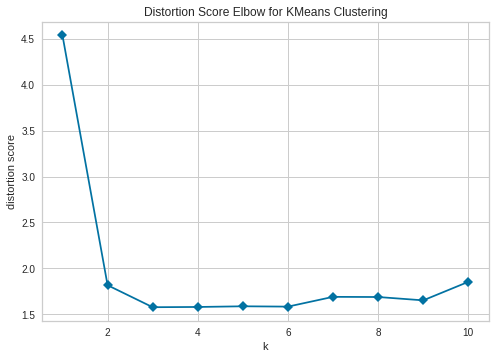

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(x)
visualizer.poof()

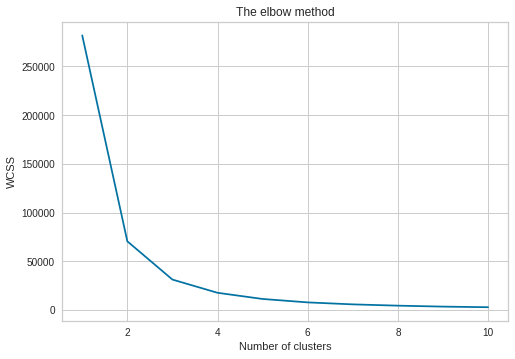

In [ ]:

x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

*VISUALIZE DATA*

Text(0, 0.5, 'Sepal Width')

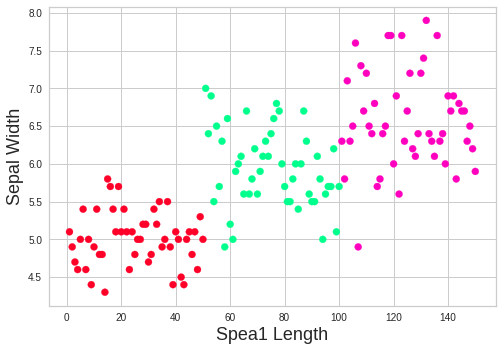

In [ ]:
plt.scatter(x[:,0], x[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

Text(0, 0.5, 'Petal Width')

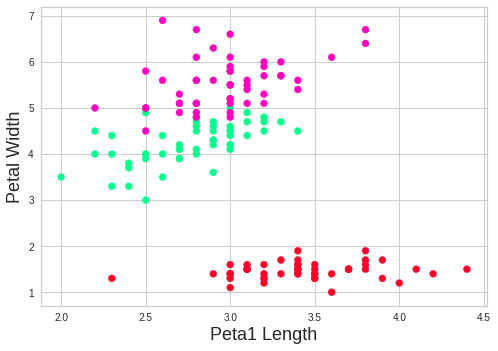

In [ ]:
plt.scatter(x[:,2], x[:,3], c=y, cmap='gist_rainbow')
plt.xlabel('Peta1 Length', fontsize=18)
plt.ylabel('Petal Width', fontsize=18)

In [ ]:
df=data

*CREATE MODEL*

In [ ]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

# ***FOR FIRST 2 FEATURES***

*PLOT CENTROID*

In [ ]:
centers = km.cluster_centers_
print(centers)

[[ 25.           5.00612245   3.42040816   1.46530612]
 [125.           6.57058824   2.97058824   5.52352941]
 [ 74.5          5.922        2.78         4.206     ]]


In [ ]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(data.loc[data['Species'] == i]['SepalLengthCm'].mean())
    result_list.append(data.loc[data['Species'] == i]['SepalWidthCm'].mean())
    
    centroids[i] = result_list

In [ ]:
centroids

{0: [5.005999999999999, 3.4180000000000006],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

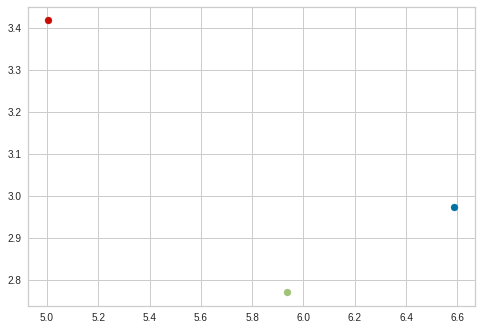

In [ ]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

*UPDATE DATAFRAME BY CALCULATING DISTANCE*

In [ ]:
def assignment(data, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        data['distance_from_{}'.format(i)] = (
            np.sqrt(
                (data['SepalLengthCm'] - centroids[i][0]) ** 2
                + (data['SepalWidthCm'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    data['closest'] = data.loc[:, centroid_distance_cols].idxmin(axis=1)
    data['closest'] = data['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    data['color'] = data['closest'].map(lambda x: colmap[x])
    return data

In [ ]:
data = assignment(data, centroids)

In [ ]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance_from_0,distance_from_1,distance_from_2,closest,color
0,1,5.1,3.5,1.4,0.2,0,0.124740,1.109863,1.578233,0,r
1,2,4.9,3.0,1.4,0.2,0,0.431231,1.061224,1.688200,0,r
2,3,4.7,3.2,1.3,0.2,0,0.375713,1.308662,1.901478,0,r
3,4,4.6,3.1,1.5,0.2,0,0.515713,1.376153,1.991989,0,r
4,5,5.0,3.6,1.4,0.2,0,0.182099,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1.744809,0.797870,0.114978,2,b
146,147,6.3,2.5,5.0,1.9,2,1.586556,0.453206,0.554635,1,g
147,148,6.5,3.0,5.2,2.0,2,1.551374,0.609094,0.091761,2,b
148,149,6.2,3.4,5.4,2.3,2,1.194136,0.683078,0.576212,2,b


In [ ]:
data['color']

0      r
1      r
2      r
3      r
4      r
      ..
145    b
146    g
147    b
148    b
149    g
Name: color, Length: 150, dtype: object

*VISUALIZE CLUSTERS*

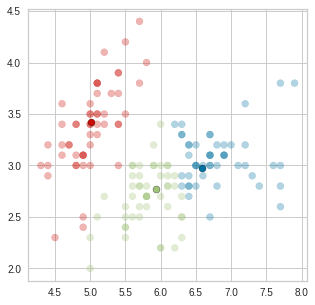

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color=data['color'],cmap='gist_rainbow', alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

*VISUALIZE CLUSTERS WITH UPDATED CENTROIDS*

In [ ]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(data[data['closest'] == i]['SepalLengthCm'])
        centroids[i][1] = np.mean(data[data['closest'] == i]['SepalWidthCm'])
    return k

In [ ]:
centroids = update(centroids)
centroids

{0: [5.00943396226415, 3.373584905660378],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333331, 3.0687499999999996]}

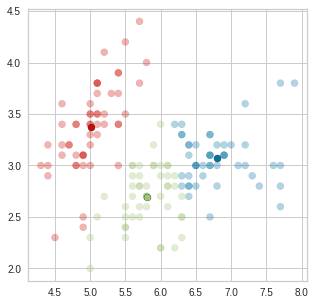

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color=data['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [ ]:
data = assignment(data, centroids)

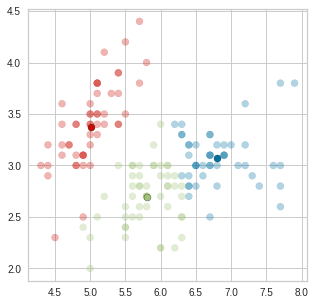

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color=data['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

*PLOT FINAL CLUSTERS AS NO FURTHER CHANGE*

In [ ]:
while True:
    closest_centroids = data['closest'].copy(deep=True)
    centroids = update(centroids)
    data = assignment(data, centroids)
    if closest_centroids.equals(data['closest']):
        break

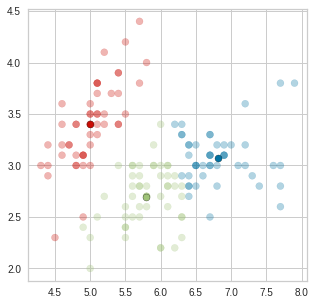

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], color=data['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()

# ***FOR NEXT 2 FEATURES***

*PLOT CENTROID*

In [ ]:
centroids = {}
for i in range(3):
    result_list = []
    result_list.append(df.loc[df['Species'] == i]['PetalLengthCm'].mean())
    result_list.append(df.loc[df['Species'] == i]['PetalWidthCm'].mean())
    
    centroids[i] = result_list

In [ ]:
centroids

{0: [1.464, 0.2439999999999999],
 1: [4.26, 1.3259999999999998],
 2: [5.552, 2.026]}

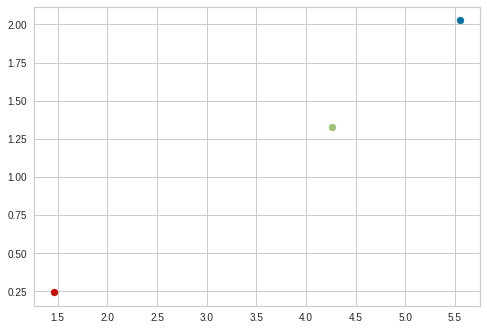

In [ ]:
colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i])
plt.show()

*UPDATE DATAFRAME BY CALCULATING DISTANCE*

In [ ]:
def assignment(df, centroids):
    for i in range(3):
        # sqrt((x1 - x2)^2 + (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['PetalLengthCm'] - centroids[i][0]) ** 2
                + (df['PetalWidthCm'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [ ]:
df = assignment(df, centroids)

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,distance_from_0,distance_from_1,distance_from_2,closest,color
0,1,5.1,3.5,1.4,0.2,0,0.077666,3.073675,4.535789,0,r
1,2,4.9,3.0,1.4,0.2,0,0.077666,3.073675,4.535789,0,r
2,3,4.7,3.2,1.3,0.2,0,0.169800,3.166935,4.627503,0,r
3,4,4.6,3.1,1.5,0.2,0,0.056851,2.980852,4.444432,0,r
4,5,5.0,3.6,1.4,0.2,0,0.077666,3.073675,4.535789,0,r
...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,4.264368,1.353616,0.446072,2,b
146,147,6.3,2.5,5.0,1.9,2,3.904566,0.936523,0.566198,2,b
147,148,6.5,3.0,5.2,2.0,2,4.128103,1.156666,0.352959,2,b
148,149,6.2,3.4,5.4,2.3,2,4.440634,1.499425,0.313337,2,b


*VISUALIZE CLUSTERS*

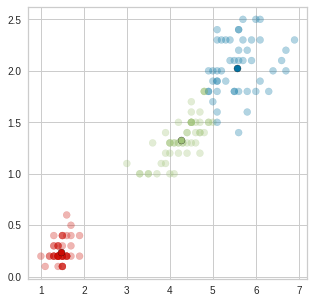

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

*VISUALIZE CLUSTERS WITH UPDATED CENTROIDS*

In [ ]:
def update(k):
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['PetalLengthCm'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['PetalWidthCm'])
    return k

In [ ]:
centroids = update(centroids)
centroids

{0: [1.464, 0.2439999999999999],
 1: [4.269230769230769, 1.342307692307692],
 2: [5.595833333333332, 2.0374999999999996]}

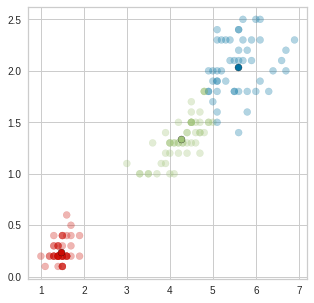

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i], edgecolor='k')

plt.show()

In [ ]:
df = assignment(df, centroids)

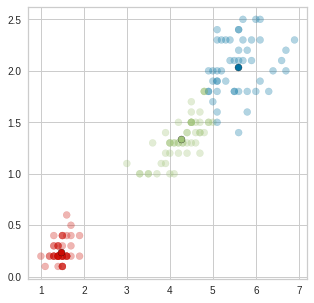

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')
plt.show()

*PLOT FINAL CLUSTERS AS NO FURTHER CHANGE*

In [ ]:
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

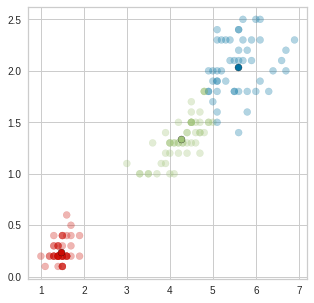

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color=df['color'], alpha=0.3)
for i in centroids.keys():
    plt.scatter(centroids[i][0],centroids[i][1], color=colmap[i], edgecolor='k')

plt.show()